# Some natural gas

In [1]:
import pandas as pd
import sqlite3

import sqlalchemy as sa
import matplotlib.pyplot as plt
from datetime import datetime, date

%run '../serv_energy.py'
eng_co=sa.create_engine('sqlite+pysqlite:///fuels.sqlite3') #, echo=True)

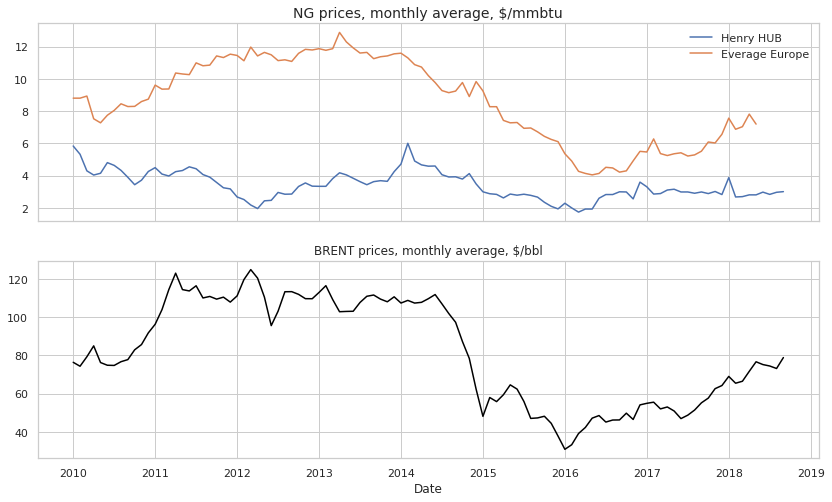

In [36]:
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
#plt.style.use()

fig, (ax1, ax2)=plt.subplots(figsize=(14,8), nrows=2, ncols=1, sharex=True)

nat_gas=pd.read_sql('select * from NG_BRENT', eng_co).set_index('Date').rename(columns={'NG_HH':'Henry HUB', 
                                                                                           'NG_EUROPE':'Everage Europe',
                                                                                       'CRUDE_BRENT':'BRENT, $/bbl'})

nat_gas=FuelsDataFrame(nat_gas)
nat_gas.index_to_datetime()
nat_gas.loc['jan-2010':, ('Henry HUB', 'Everage Europe')].plot.line(ax=ax1)
nat_gas.loc['jan-2010':,  'CRUDE_BRENT':'BRENT, $/bbl'].plot.line(ax=ax2, color='black', legend=False)
ax1.set_title('NG prices, monthly average, $/mmbtu', fontsize=14)
ax2.set_title('BRENT prices, monthly average, $/bbl', fontsize=12)

plt.show();